1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox


plt.rcParams['figure.figsize'] = [20, 10]

2. Reading and ploting the data

In [2]:
# Read the data file
DF = pd.read_csv("../data/public/clean_train.csv", parse_dates = True)


DF['Day'] =  pd.to_datetime(DF['Day'], format='%Y-%m-%d')
DF.set_index("Day", inplace=True)
DF = DF.asfreq("D")
print(DF)

                 s001       s002       s003       s004       s005       s006  \
Day                                                                            
1996-03-18  13.407029  11.550454   5.640590  13.180272   9.778912   9.240363   
1996-03-19  14.725057  13.591270  14.399093   8.446712  10.813492  11.635488   
1996-03-20  20.564059  15.036848  24.418934  19.515306  21.612812  12.103175   
1996-03-21  34.708050  21.570295  28.784014  28.883220  38.520408  21.414399   
1996-03-22  26.629819  19.444444  20.620748  19.472789  24.744898  24.674036   
...               ...        ...        ...        ...        ...        ...   
1998-03-18  30.087868  18.750000  31.545249  27.054989  25.283447  23.767007   
1998-03-19  54.138322  29.676871  21.683673  36.848073  41.723356  30.881519   
1998-03-20  53.500567  30.725624  35.586735  29.946145  33.475057  37.074830   
1998-03-21  39.696712  16.737528  18.636621  20.082200  16.198980   4.067460   
1998-03-22  29.705215  12.046485  13.095

3. Checking for missing values

In [3]:
print(DF.isna().sum().sort_values(ascending=False))

s001    0
s071    0
s082    0
s081    0
s080    0
       ..
s034    0
s033    0
s032    0
s031    0
s111    0
Length: 111, dtype: int64


4. Plotting the time series


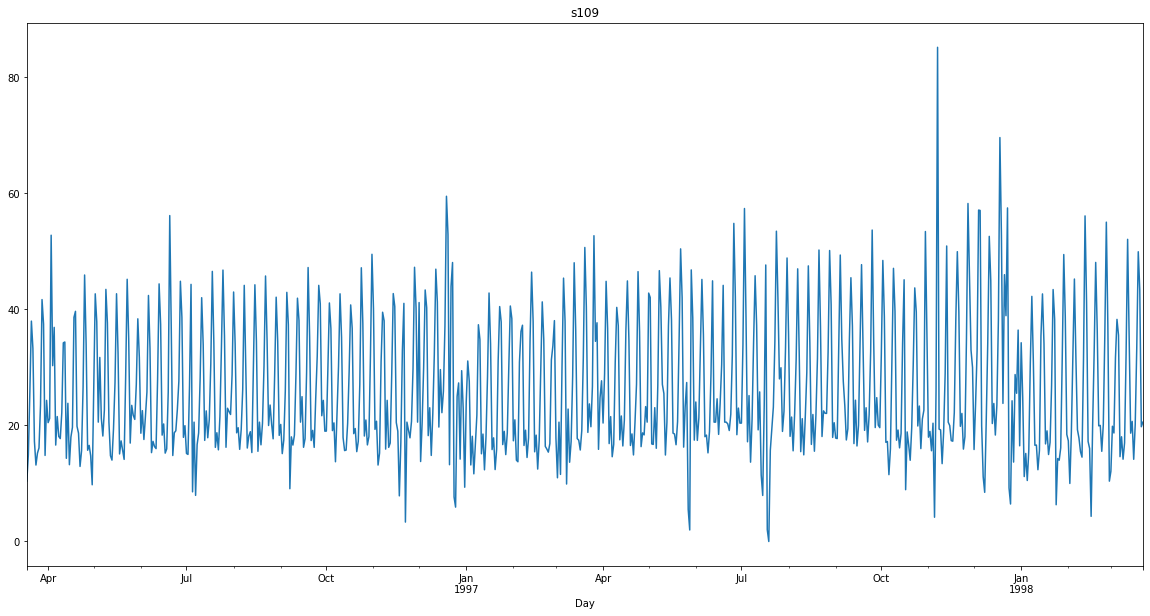

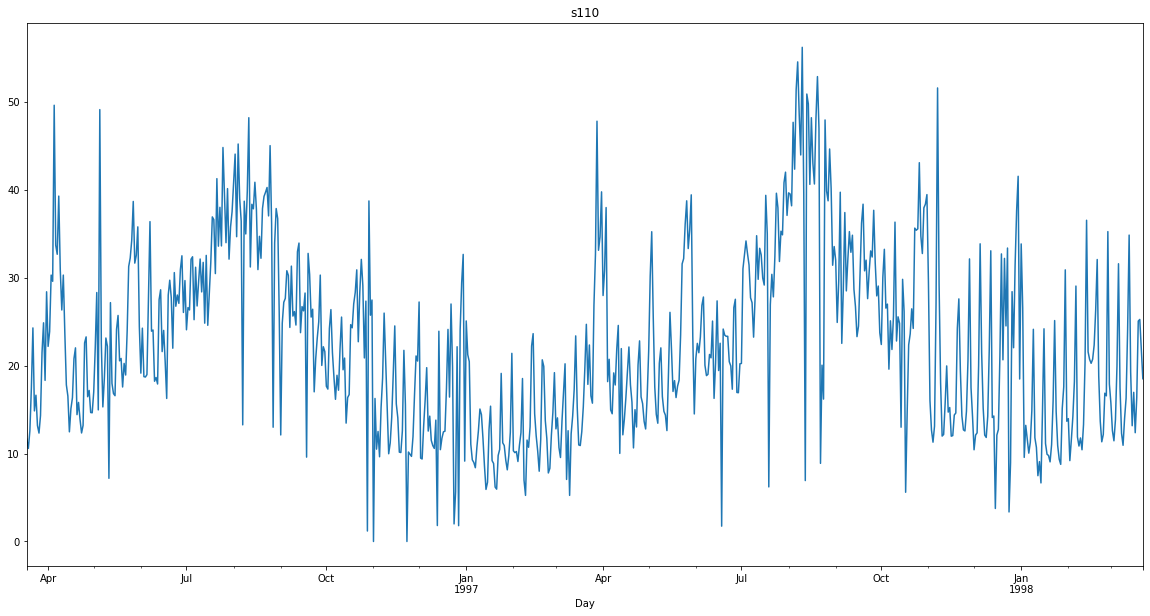

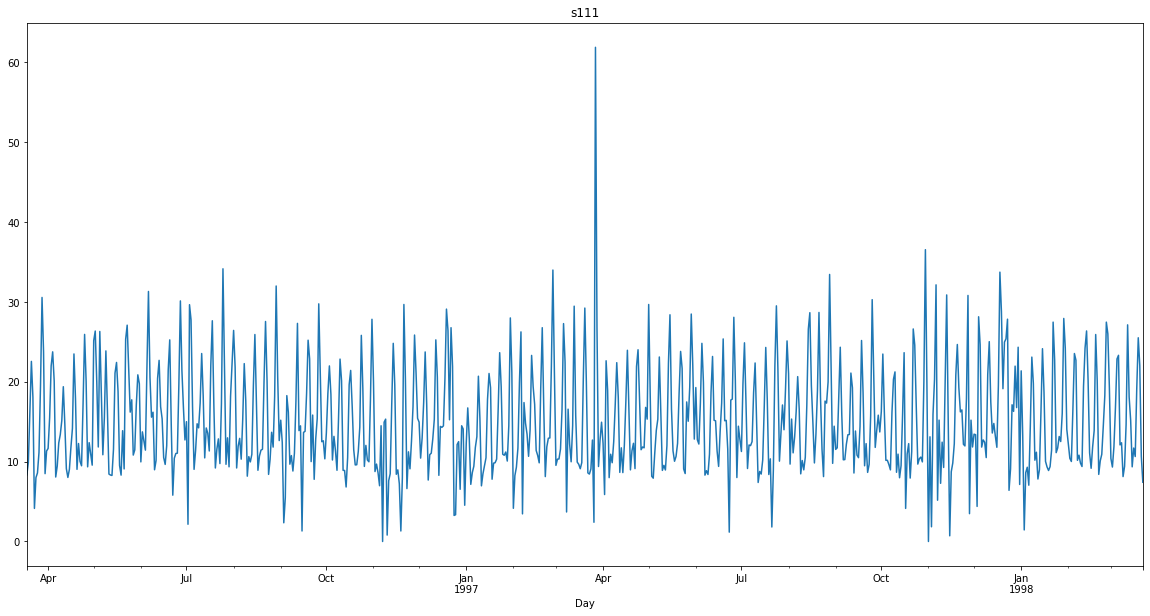

In [4]:
for i in list(DF.columns)[108:111]:
    plt.figure()
    plt.title(i)
    DF[i].plot()
    plt.show()

# Seasonal plots of the chosen series

5. 

<AxesSubplot:xlabel='Day'>

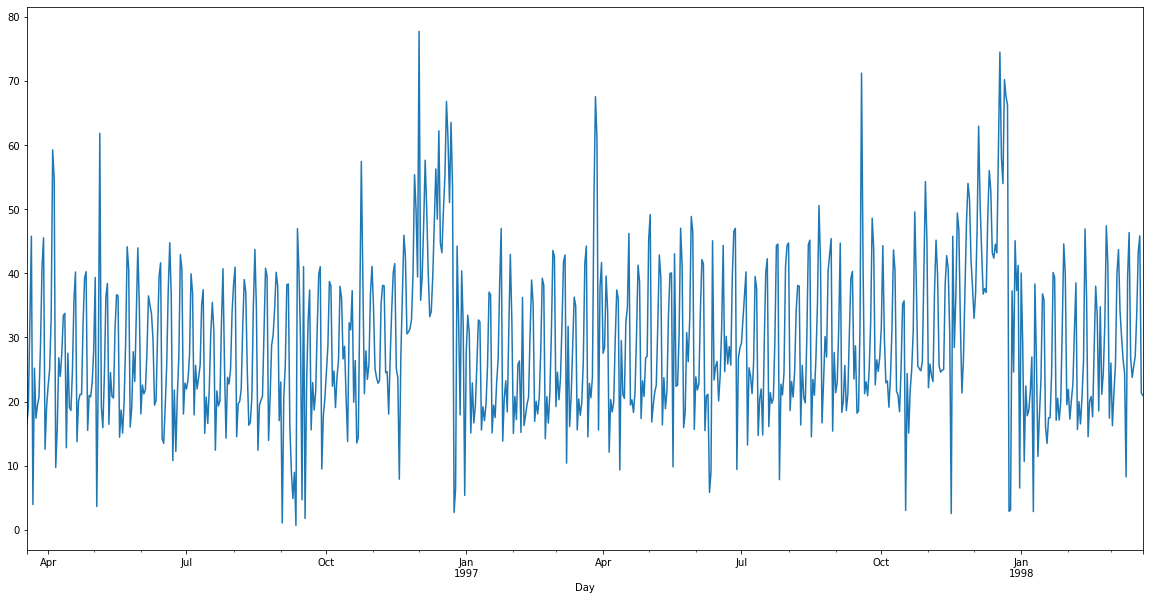

In [5]:
my_series = "s024"
DF[my_series].plot()

6. Extract calendar variables from dates (useful for seasonal plots)

In [6]:
DF["d"] = DF.index.day.to_numpy()
DF["m"] = DF.index.month.to_numpy()
DF["y"] = DF.index.year.to_numpy()
DF["w"] = DF.index.weekday.to_numpy()
DF["wy"] = DF.index.isocalendar().week.to_numpy()
DF.head()

,s001,s002,s003,s004,s005,s006,s007,s008,s009,s010,...,s107,s108,s109,s110,s111,d,m,y,w,wy
Day,,,,,,,,,,,,,,,,,,,,,
1996-03-18,13.407029,11.550454,5.640590,13.180272,9.778912,9.240363,14.937642,2.891156,7.341270,10.289116,...,8.857710,9.297052,10.416667,11.635488,8.337717,18,3,1996,0,12
1996-03-19,14.725057,13.591270,14.399093,8.446712,10.813492,11.635488,16.284014,12.358277,9.155329,12.712585,...,11.380385,12.429138,14.923469,10.586735,9.876381,19,3,1996,1,12
1996-03-20,20.564059,15.036848,24.418934,19.515306,21.612812,12.103175,16.666667,16.383220,10.586735,14.441610,...,11.777211,13.251134,25.864512,12.570862,16.320358,20,3,1996,2,12
1996-03-21,34.708050,21.570295,28.784014,28.883220,38.520408,21.414399,23.568594,30.158730,12.500000,19.401927,...,18.820862,24.815760,37.996032,17.517007,22.553919,21,3,1996,3,12
1996-03-22,26.629819,19.444444,20.620748,19.472789,24.744898,24.674036,26.303855,31.179138,7.157029,21.541950,...,24.305556,19.231859,33.290816,24.291383,18.095739,22,3,1996,4,12


7. Seasonal decompose

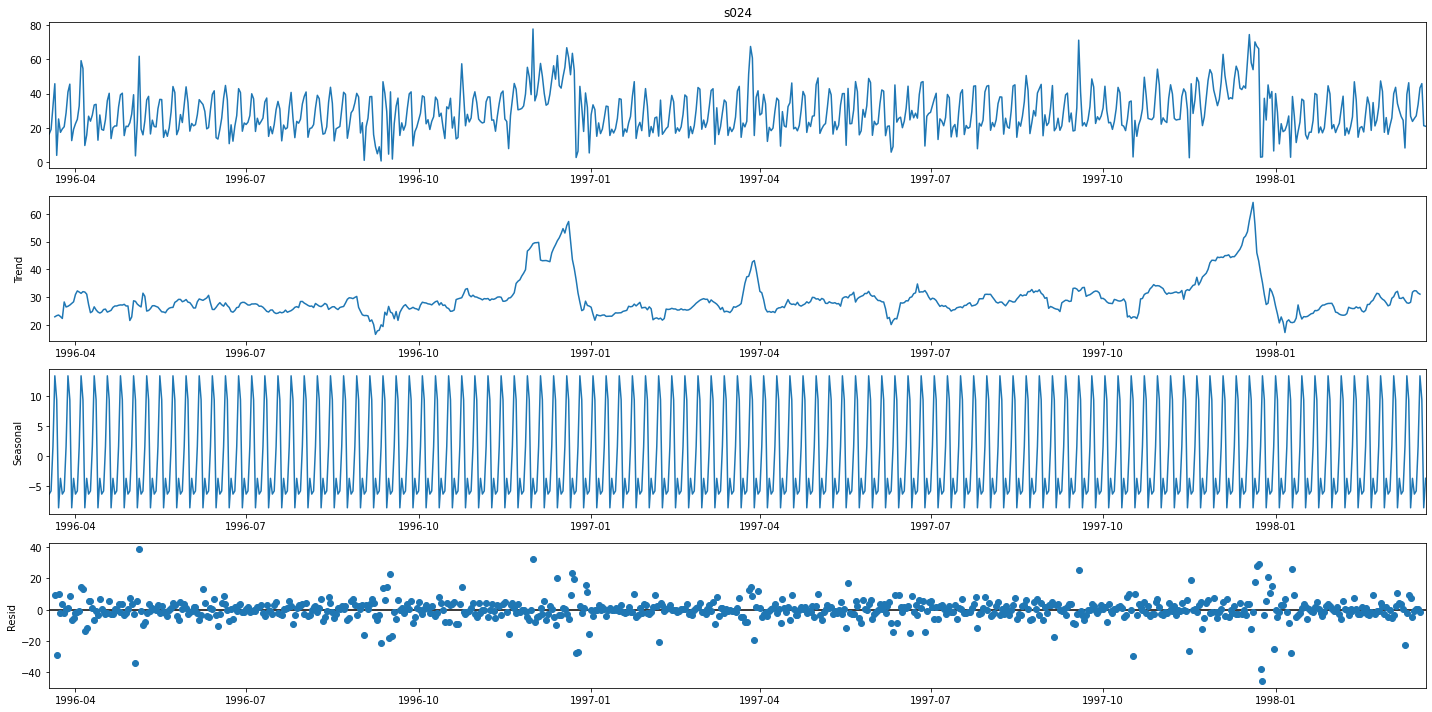

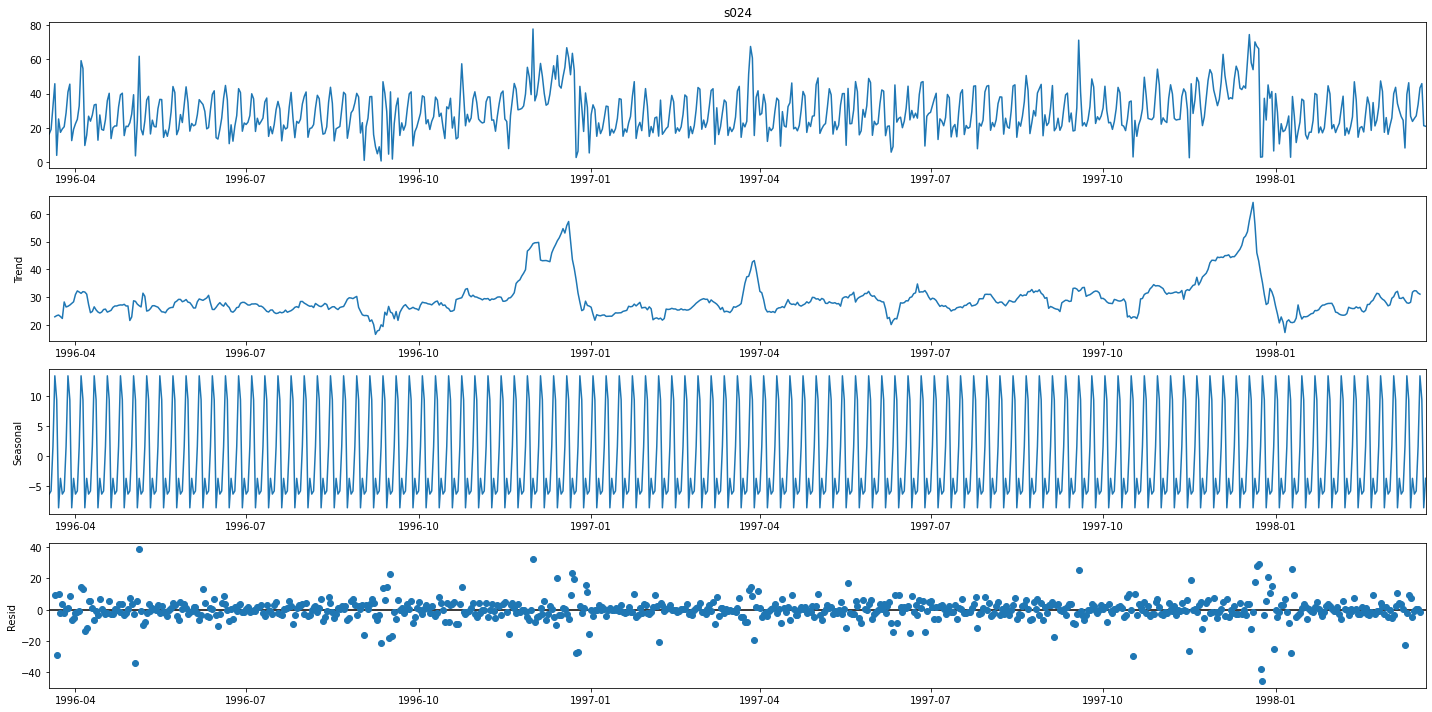

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Load the time series data
data = DF[my_series]

# Perform seasonal decomposition
result = seasonal_decompose(data, model='additive')

result.plot()

8. Generate a seasonal plot with the day of the week in the x-axis.

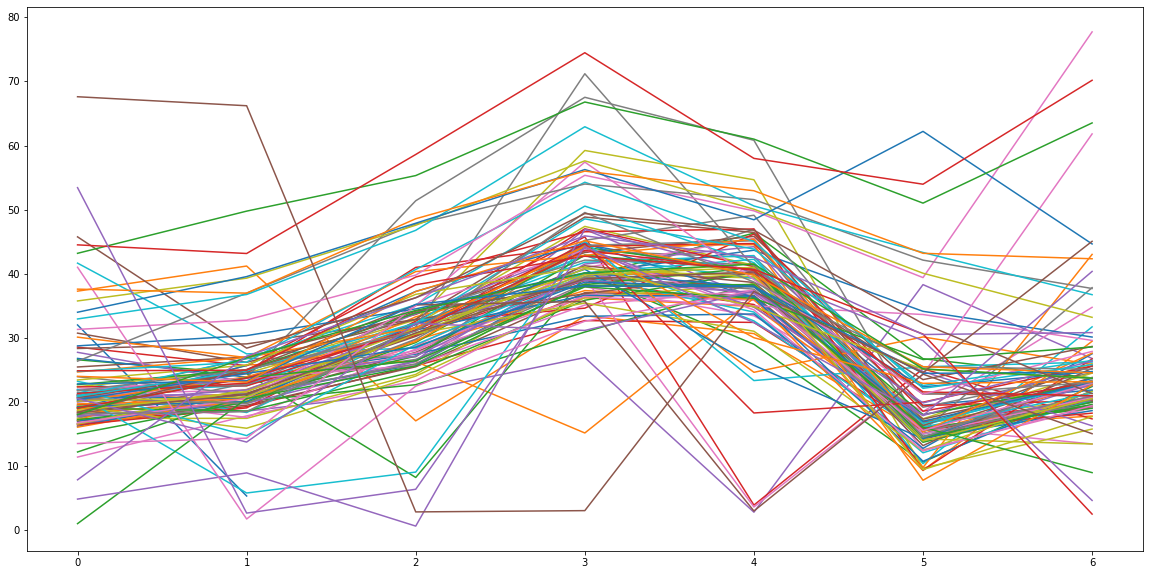

In [8]:
# Seasonal plots (Day of the week)

patterns_day_week = DF[[my_series, "wy", "y", "w"]].pivot_table(index=['w'], columns=['wy', 'y'])
plt.plot(patterns_day_week)


9. Plot a boxplot for each day of the week.

<AxesSubplot:>

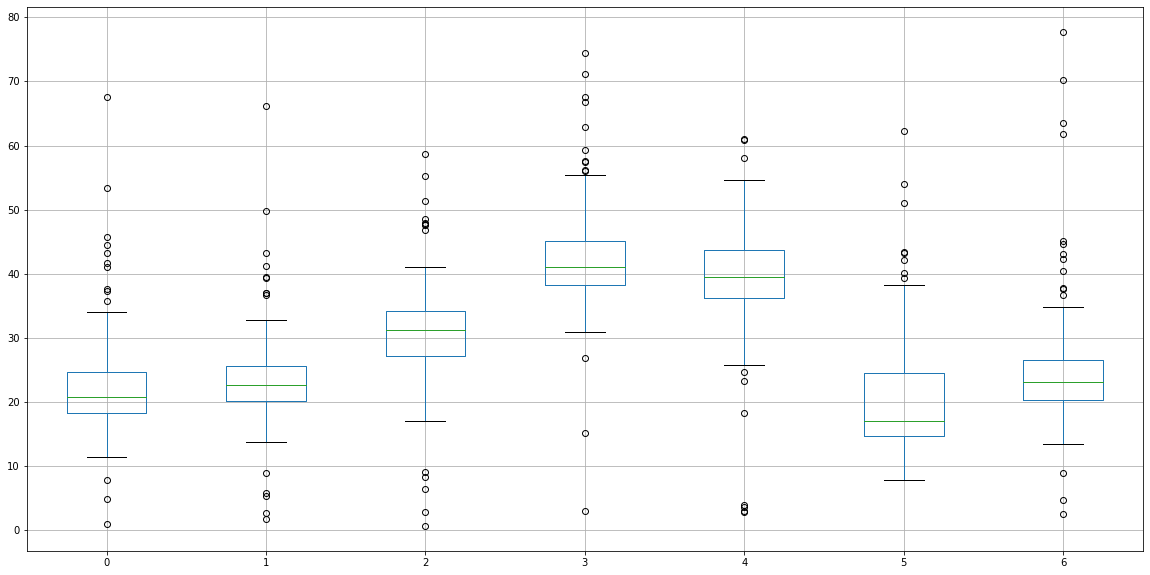

In [9]:
patterns_day_week.transpose().boxplot()

10. Generate a seasonal plot with the day of the month in the x-axis.

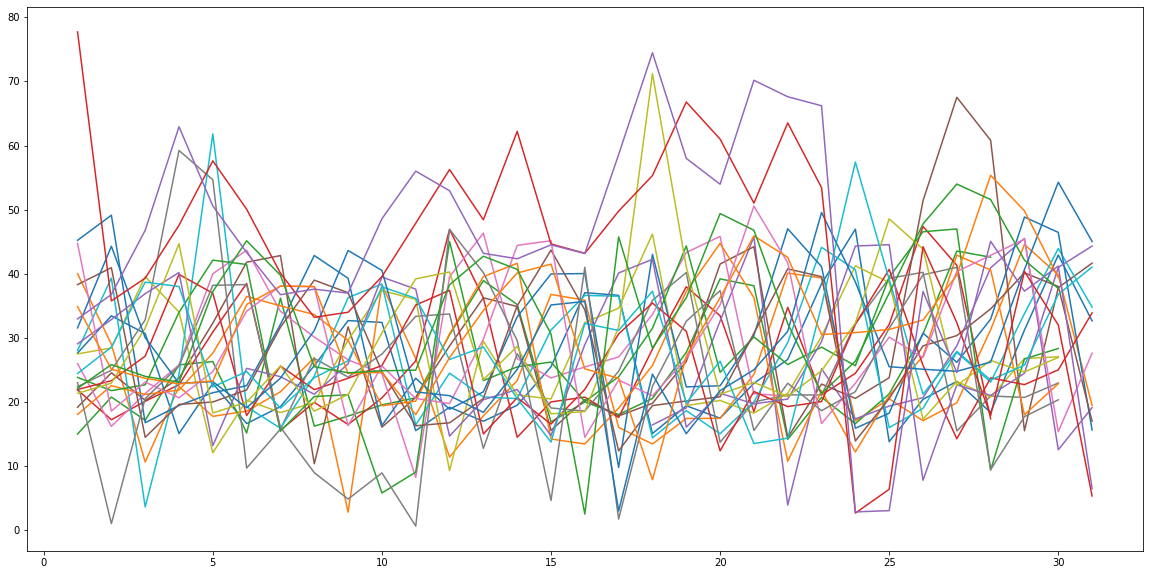

In [10]:
# Seasonal plots (Day of the month)
patterns_day_month = DF[[my_series, "d", "m", "y"]].pivot_table(index=['d'], columns=['m', 'y'])
plt.plot(patterns_day_month)
plt.show()

11. Box plot for month

<AxesSubplot:>

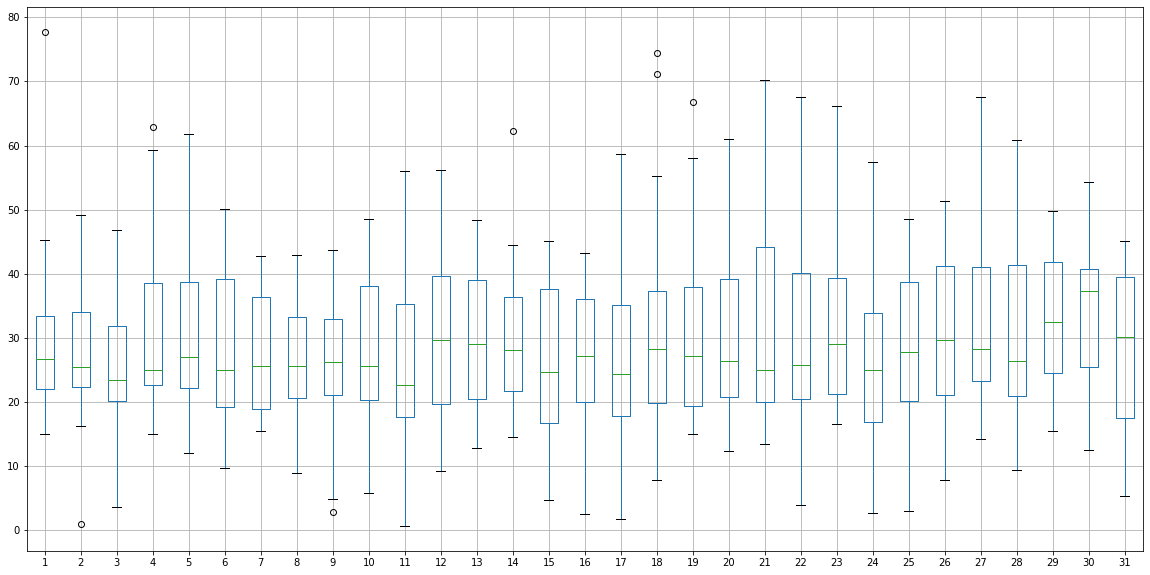

In [11]:
patterns_day_month.transpose().boxplot()

12. Lagged scatterplots for lags 1, 3 and 7.

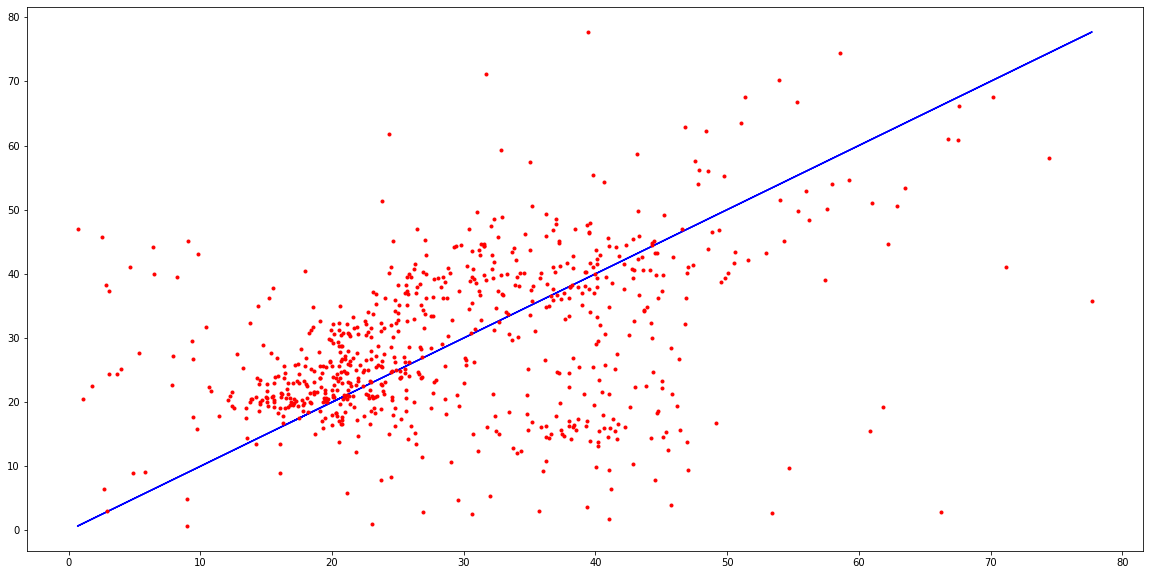

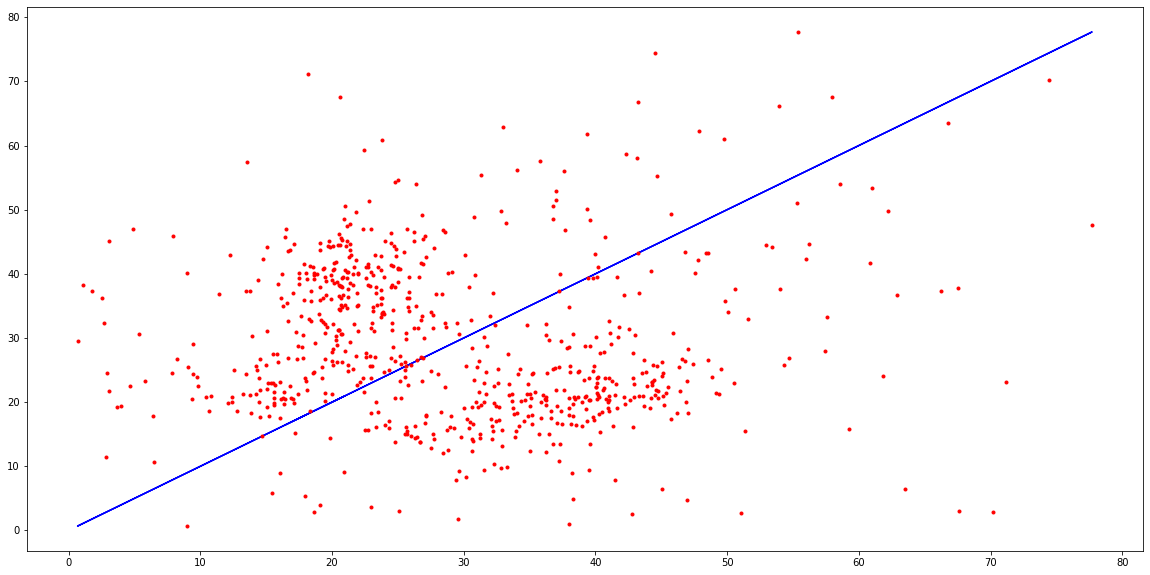

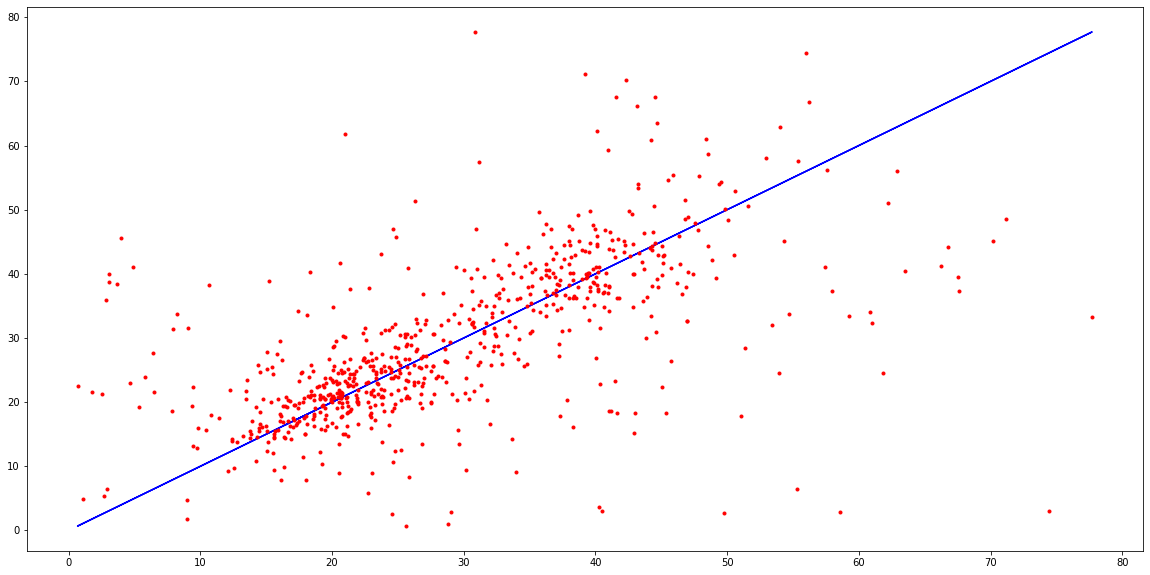

In [12]:
# Lag plot

def lag_plot(series, lag = -1, ls = 'r.'):
    y_lag = series.shift(lag)
    plt.plot(series, series, 'b-')
    plt.plot(y_lag, series, ls)
    plt.show()

lag_plot(DF[my_series], lag = 1)
lag_plot(DF[my_series], lag = 3)
lag_plot(DF[my_series], lag = 7)

# Autocorrelation

13. ACF with lags

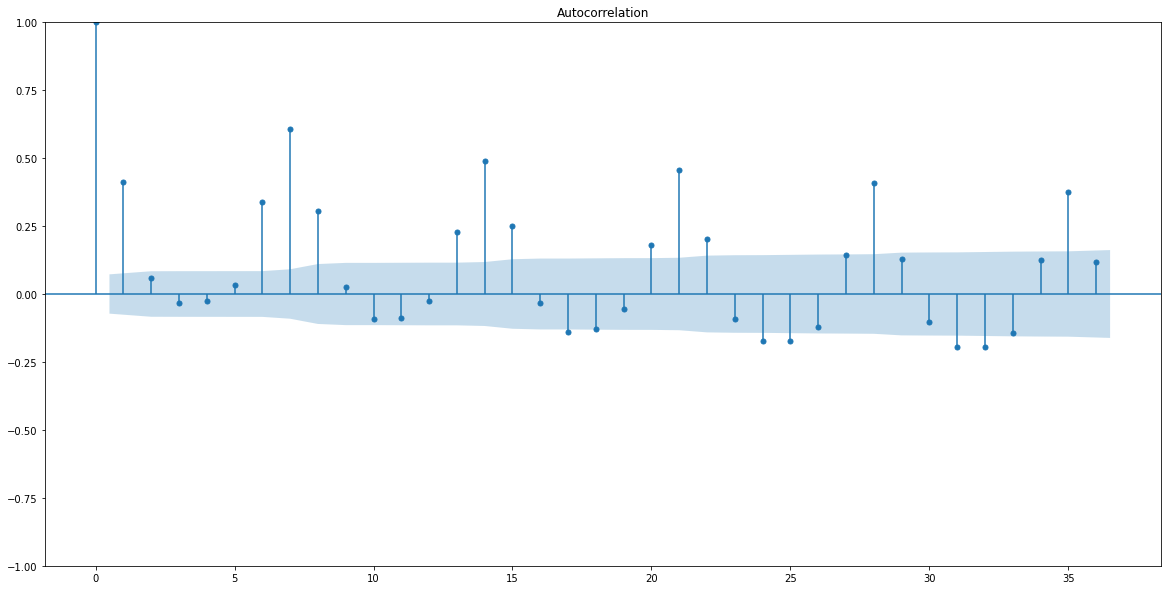

In [13]:
lags = 36

plot_acf(DF[my_series], lags= lags, alpha=0.05)
plt.show()

14. ACF after applying a seasonal difference

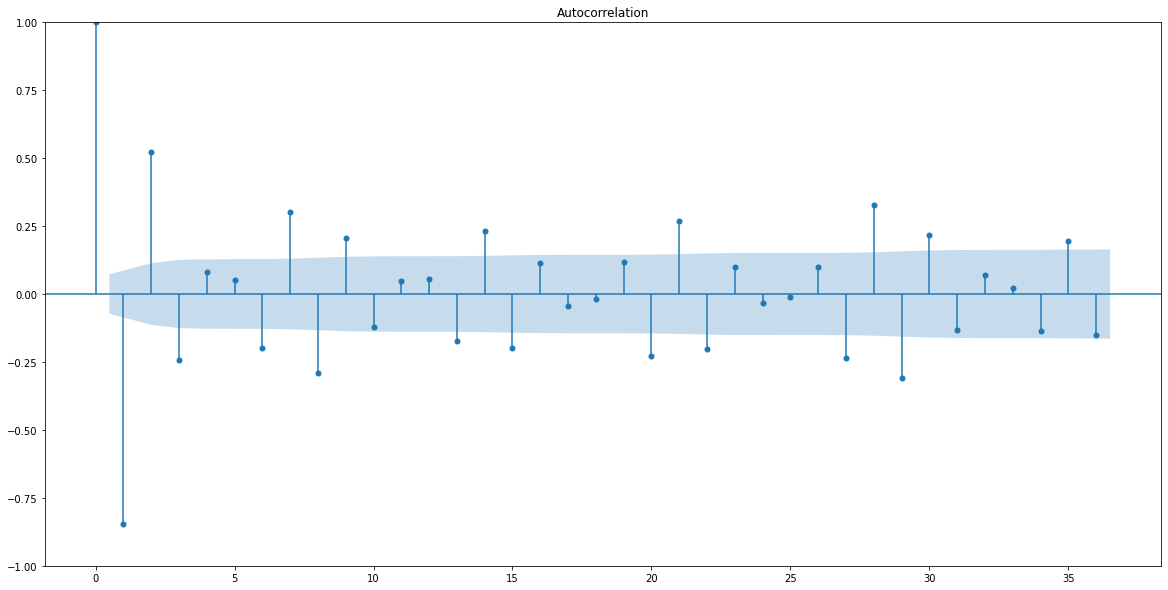

In [14]:
plot_acf(np.diff(DF[my_series], 7), lags= lags, alpha=0.05)
plt.show()

15. ACF values for the first 20 lags

In [15]:
from statsmodels.graphics.tsaplots import acf
print(acf(DF[my_series]))

[ 1.          0.41365282  0.05896809 -0.03288968 -0.0272934   0.03407988
  0.33785025  0.60873619  0.3037203   0.02598934 -0.09257623 -0.0881674
 -0.02476102  0.22866502  0.49075497  0.24893562 -0.03369682 -0.13936571
 -0.12751078 -0.05467146  0.18067911  0.45583609  0.201315   -0.09061108
 -0.17232079 -0.17348368 -0.11962628  0.14219162  0.40946566]


16. Perform a Ljung-Box test for the series

In [16]:
from statsmodels.stats.diagnostic import acorr_ljungbox
import numpy as np

# Load the time series data
data = DF[my_series]

# Compute the Ljung-Box test
result = acorr_ljungbox(data, lags=10)

# Check the p-values
significant_p_values = result[result['lb_pvalue'] < 0.05]
if len(significant_p_values) > 0:
  print("There is evidence of autocorrelation in the time series.")
  print(result)
else:
  print("There is no evidence of autocorrelation in the time series.")

There is evidence of autocorrelation in the time series.
       lb_stat      lb_pvalue
1   126.278887   2.671710e-29
2   128.848601   1.049257e-28
3   129.649104   6.437117e-28
4   130.201122   3.526881e-27
5   131.062965   1.415729e-26
6   215.878572   7.869358e-44
7   491.607093  5.107306e-102
8   560.340529  7.805011e-116
9   560.844504  5.263780e-115
10  567.247980  1.822104e-115
